# Import Libraries

In [ ]:
pip install basemap


In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization


# Import Data

In [ ]:
# Load the dataset
df = pd.read_csv('Nuclear Incidents - Sheet3.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Sort the DataFrame by date
df.sort_index(inplace=True)



# 1. Temporal Analysis:
   - Identify the frequency of incidents over the years. Are there spikes or trends?

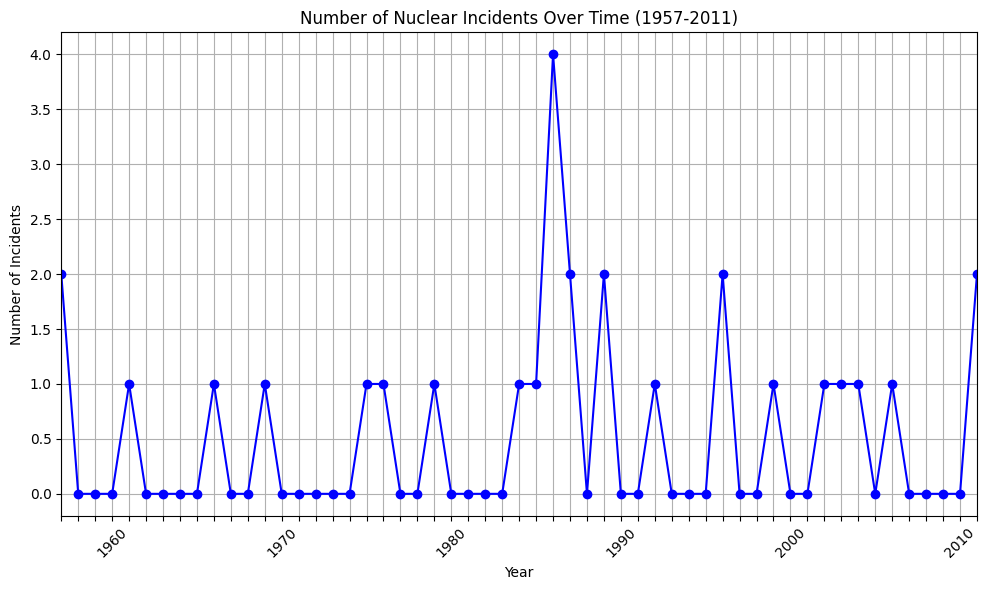

In [1]:


# Resample the data by year and count the number of incidents per year
incidents_per_year = df.resample('Y').size()

# Plotting the temporal analysis
plt.figure(figsize=(10, 6))
incidents_per_year.plot(kind='line', marker='o', color='blue')

plt.title('Number of Nuclear Incidents Over Time (1957-2011)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(incidents_per_year.index, rotation=45)
plt.tight_layout()

plt.show()


#2. Geographical Patterns

*   Map the incidents based on their coordinates. Are incidents clustered in specific regions?
*   Analyze if there's any correlation between geographic locations and the type/severity of incidents.


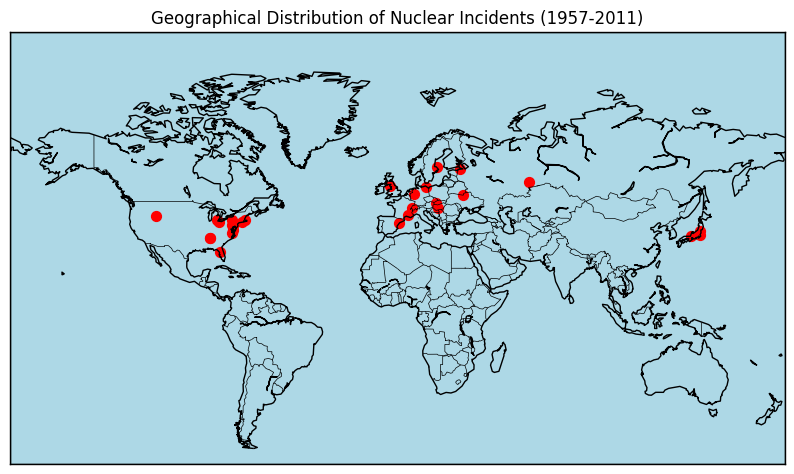

In [6]:

from mpl_toolkits.basemap import Basemap

# Get latitude and longitude data
lons = df['Longitude'].tolist()
lats = df['Latitude'].tolist()

# Create a basic world map using Basemap
plt.figure(figsize=(10, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')

# Plot incidents on the map
x, y = m(lons, lats)
m.scatter(x, y, marker='o', color='red', s=50)

plt.title('Geographical Distribution of Nuclear Incidents (1957-2011)')
plt.show()


#3. Categorization Analysis


1.   Summarize the incidents by category (Storage/Handling, Operator Error, Technical Flaws, etc.).
2.   Determine which categories are more prevalent and if certain categories lead to more severe outcomes.


In [7]:
# Group incidents by Category and count the occurrences
category_counts = df['Category'].value_counts()

# Display the counts
print("Category-wise Incident Counts:")
print(category_counts)

Category-wise Incident Counts:
Operator Error                          3
Storage/Handling                        1
Inspection Findings                     1
Natural Disaster/Operational Failure    1
Safety Systems Failure                  1
Steam Explosion                         1
Corrosion Cleaning                      1
Corrosion                               1
Operational/Safety Procedures           1
Equipment Malfunction                   1
Valve Leak                              1
Equipment Rupture                       1
Cooling System Failure                  1
Malfunctions                            1
Operational/Safety Measures             1
Cooling Malfunctions                    1
Equipment Failure                       1
Experimental Operation                  1
Design/Safety Procedures                1
Equipment Problems                      1
Instrumentation Malfunction             1
Safety Violations/Design Problems       1
Operator/Technical Flaws                1
Ele

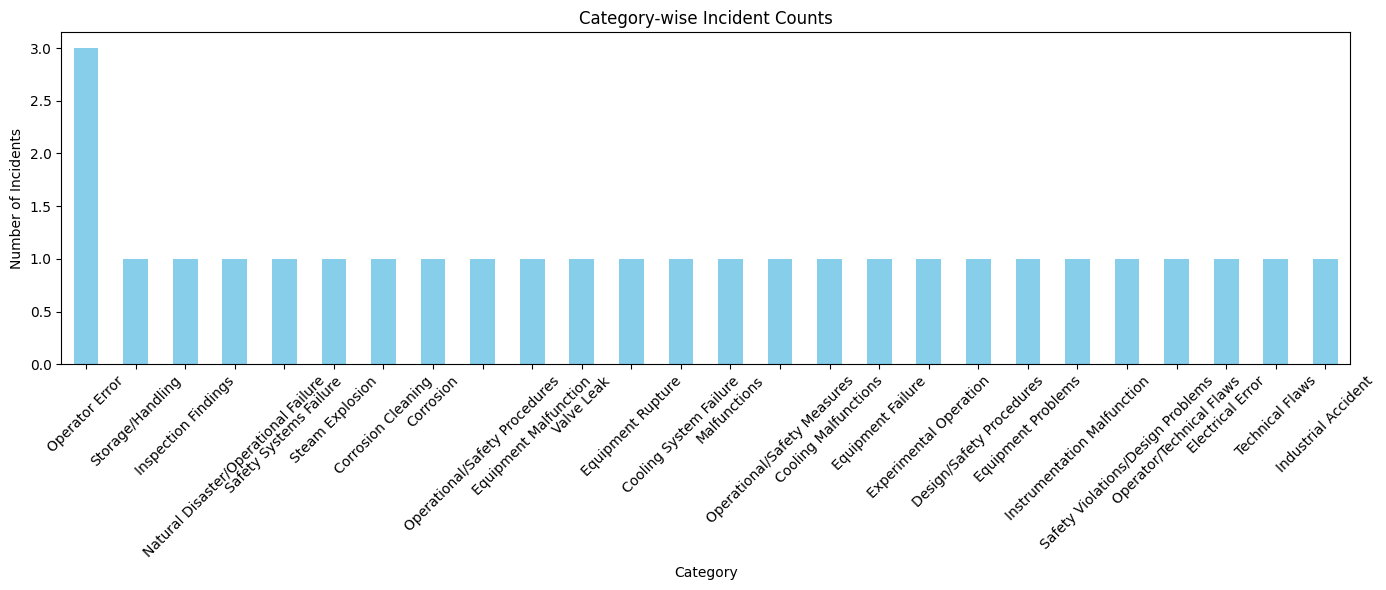

In [9]:


# Plotting the category-wise incident counts
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='skyblue')

plt.title('Category-wise Incident Counts')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# 4. Casualty Analysis


*   Analyze direct and indirect deaths concerning incident categories.
*   Identify incidents with the highest casualties and their associated categories.


In [10]:
# Convert 'Numbers of Direct Deaths' and 'Numbers of InDirect Deaths' to numeric (some entries have commas)
df['Numbers of Direct Deaths'] = pd.to_numeric(df['Numbers of Direct Deaths'].replace(',', '', regex=True), errors='coerce')
df['Numbers of InDirect Deaths'] = pd.to_numeric(df['Numbers of InDirect Deaths'].replace(',', '', regex=True), errors='coerce')

# Group incidents by Category and sum the direct and indirect deaths
category_casualties = df.groupby('Category')[['Numbers of Direct Deaths', 'Numbers of InDirect Deaths']].sum()

# Display the total casualties per category
print("Casualties based on Incident Category:")
print(category_casualties)

Casualties based on Incident Category:
                                      Numbers of Direct Deaths  \
Category                                                         
Cooling Malfunctions                                       0.0   
Cooling System Failure                                     0.0   
Corrosion                                                  0.0   
Corrosion Cleaning                                         0.0   
Design/Safety Procedures                                  28.0   
Electrical Error                                           0.0   
Equipment Failure                                          4.0   
Equipment Malfunction                                      0.0   
Equipment Problems                                         0.0   
Equipment Rupture                                          0.0   
Experimental Operation                                     0.0   
Industrial Accident                                        1.0   
Inspection Findings                  

<Figure size 1400x800 with 0 Axes>

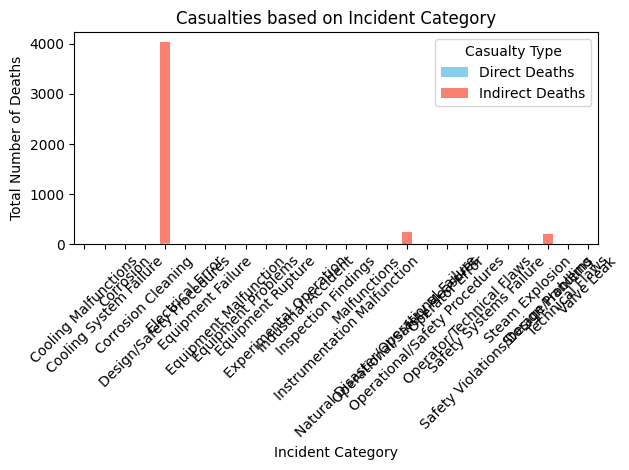

In [13]:
# Convert 'Numbers of Direct Deaths' and 'Numbers of InDirect Deaths' to numeric (some entries have commas)
df['Numbers of Direct Deaths'] = pd.to_numeric(df['Numbers of Direct Deaths'].replace(',', '', regex=True), errors='coerce')
df['Numbers of InDirect Deaths'] = pd.to_numeric(df['Numbers of InDirect Deaths'].replace(',', '', regex=True), errors='coerce')

# Group incidents by Category and sum the direct and indirect deaths
category_casualties = df.groupby('Category')[['Numbers of Direct Deaths', 'Numbers of InDirect Deaths']].sum()

# Plotting the casualties based on incident category
plt.figure(figsize=(14, 8))
category_casualties.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Casualties based on Incident Category')
plt.xlabel('Incident Category')
plt.ylabel('Total Number of Deaths')
plt.legend(title='Casualty Type', labels=['Direct Deaths', 'Indirect Deaths'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [17]:
print(df.columns)

Index(['Location ', 'Incident', 'Category', 'Numbers of Direct Deaths',
       'Numbers of InDirect Deaths', 'INES\nlevel', 'Latitude', 'Longitude'],
      dtype='object')


# 5. INES Level Analysis:
   - Understand the severity of incidents based on the International Nuclear Event Scale (INES). Are there commonalities among incidents with high INES levels?
   - Investigate if higher INES levels correlate with specific categories or regions.

<Figure size 1000x600 with 0 Axes>

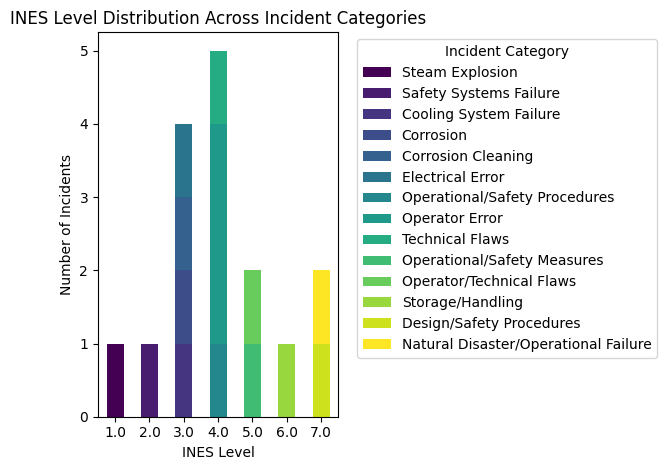

In [18]:

# Group incidents by INES level and Category, then count occurrences
ines_category_counts = df.groupby(['INES\nlevel', 'Category']).size().unstack(fill_value=0)

# Plotting INES level analysis
plt.figure(figsize=(10, 6))
ines_category_counts.plot(kind='bar', stacked=True, cmap='viridis')

plt.title('INES Level Distribution Across Incident Categories')
plt.xlabel('INES Level')
plt.ylabel('Number of Incidents')
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


# 6. Correlation Analysis:
   - Investigate correlations between incident categories, INES levels, geographical locations, and casualty counts.
   - Identify any significant patterns or associations between these variables.

In [21]:

# Convert casualty columns to numeric (some entries have commas)
df['Numbers of Direct Deaths'] = pd.to_numeric(df['Numbers of Direct Deaths'].replace(',', '', regex=True), errors='coerce')
df['Numbers of InDirect Deaths'] = pd.to_numeric(df['Numbers of InDirect Deaths'].replace(',', '', regex=True), errors='coerce')

# Select numerical columns for correlation analysis
numerical_columns = ['Numbers of Direct Deaths', 'Numbers of InDirect Deaths', 'INES\nlevel']

# Filter the dataframe for numerical columns
numerical_df = df[numerical_columns]

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                            Numbers of Direct Deaths  \
Numbers of Direct Deaths                    1.000000   
Numbers of InDirect Deaths                  1.000000   
INES\nlevel                                 0.536533   

                            Numbers of InDirect Deaths  INES\nlevel  
Numbers of Direct Deaths                      1.000000     0.536533  
Numbers of InDirect Deaths                    1.000000     0.861407  
INES\nlevel                                   0.861407     1.000000  


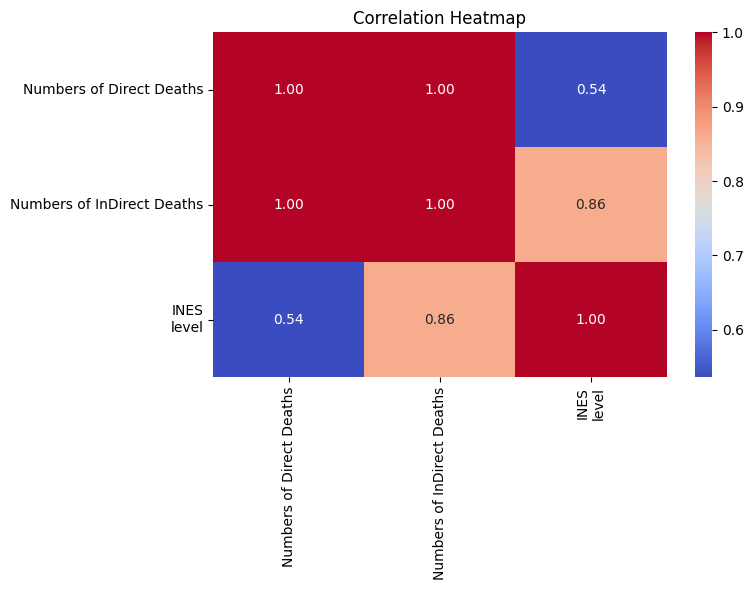

In [23]:
import seaborn as sns
# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()